In [16]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [17]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [18]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [19]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///../Resources/hawaii.sqlite")

In [20]:
# reflect an existing database into a new model (Activity 03-Stu-Dow-Dates)
Base = automap_base()
Base.prepare(autoload_with = engine)

In [21]:
# reflect the tables
session = Session(engine)

In [22]:
# View all of the classes that automap found
Base.classes.keys()

['station', 'measurement']

In [23]:
# Save references to each table
# Measurement = Base.classes.measurement
# Station = Base.classes.station

# from ChatGPT
# Example if your table names are 'Measurements' and 'Stations'
Measurement = Base.classes.measurement
Station = Base.classes.station



In [24]:
# Create our session (link) from Python to the DB
session = Session(engine)

In [25]:
# Close our session
session.close()

# Exploratory Precipitation Analysis

In [26]:
# Find the most recent date in the data set

most_recent_date = session.query(func.max(Measurement.date)).first()
most_recent_date


('2017-08-23',)

Text(0, 0.5, 'mm')

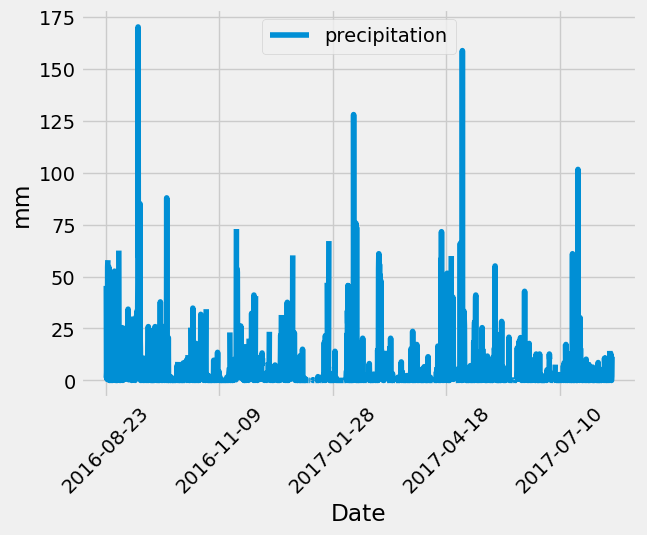

In [27]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 

# Calculate the date one year from the last date in data set.
previous_year = dt.date(2017, 8, 23) - dt.timedelta(days = 365)


# Perform a query to retrieve the data and precipitation scores
results = session.query(Measurement.date, Measurement.prcp).filter(Measurement.date >= previous_year).all()


# Save the query results as a Pandas DataFrame. Explicitly set the column names
df = pd.DataFrame(results, columns=['date', 'precipitation'])


# Sort the dataframe by date
df = df.sort_values('date')


# Use Pandas Plotting with Matplotlib to plot the data (line graph/Bar)
df.plot(x = 'date', y = 'precipitation', rot = 45)
plt.xlabel('Date')
plt.ylabel('mm')


In [28]:
df

,date,precipitation
0,2016-08-23,0.0
1009,2016-08-23,NaN
1529,2016-08-23,45.5
704,2016-08-23,1.3
361,2016-08-23,3.8
...,...,...
1527,2017-08-22,0.0
1008,2017-08-23,0.0
360,2017-08-23,0.0
1528,2017-08-23,2.0


In [29]:
# Use Pandas to calculate the summary statistics for the precipitation data

summary_stats = df.describe()
summary_stats


,precipitation
count,2021.000000
mean,4.505888
std,11.713487
min,0.000000
25%,0.000000
50%,0.500000
75%,3.300000
max,170.200000


# Exploratory Station Analysis

In [30]:
# Design a query to calculate the total number of stations in the dataset
session.query(func.count(Station.station)).all()

[(9,)]

In [31]:
#(Design a query that correctly lists the stations and observation counts in descending order and finds the most active station (USC00519281))
# Design a query to find the most active stations (i.e. which stations have the most rows?
# List the stations and their counts in descending order.

session.query(Measurement.station, func.count(Measurement.station)).\
    group_by(Measurement.station).order_by(func.count(Measurement.station).desc()).all()

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [32]:
#(Design a query that correctly finds the min, max, and average temperatures for the most active station (USC00519281))
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.

session.query(func.min(Measurement.tobs), func.max(Measurement.tobs), func.avg(Measurement.tobs)).\
              filter(Measurement.station == 'USC00519281').all()

[(12.2, 29.4, 22.03582251082252)]

Text(0.5, 4.183333333333314, 'Temperature')

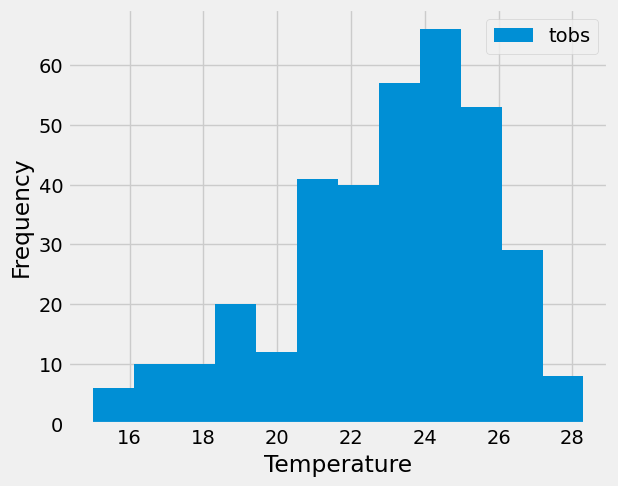

In [33]:
#(Design a query to get the previous 12 months of temperature observation (TOBS) data that filters by the station that has the greatest number of observations)
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram

previous_year = dt.date(2017, 8, 23) - dt.timedelta(days=365)

results = session.query(Measurement.tobs).\
    filter(Measurement.station == 'USC00519281').\
    filter(Measurement.date >= previous_year).all()

#Create a Pandas Dataframe from the query results
df = pd.DataFrame(results, columns=['tobs'])

#Plot the results as a histogram
df.plot.hist(bins=12)
plt.tight_layout()
plt.xlabel('Temperature')

# Close Session

In [34]:
# Close Session
session.close()